In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-strategy-personalised-offer/sample.csv
/kaggle/input/marketing-strategy-personalised-offer/train_data.csv
/kaggle/input/marketing-strategy-personalised-offer/test_data.csv


In [2]:
sample_data = pd.read_csv("/kaggle/input/marketing-strategy-personalised-offer/sample.csv")
data = pd.read_csv("/kaggle/input/marketing-strategy-personalised-offer/train_data.csv")
test_data = pd.read_csv("/kaggle/input/marketing-strategy-personalised-offer/test_data.csv")

# **About Data**

In [3]:
null_col = data.isna().sum().loc[data.isna().sum() > 0].index

In [4]:
data.drop(["car"],axis= 1, inplace= True)
data.rename(columns={'visit restaurant with rating (avg)':'Rating'},inplace = True)

In [5]:
data.dropna(axis=0,inplace= True)

In [6]:
y = data["Offer Accepted"]
data.drop(["Offer Accepted"],axis=1, inplace= True)

In [7]:
cat_columns = list(data.select_dtypes('object').columns)
num_columns = list(data.select_dtypes('int64').columns)

In [8]:
orignal_data = data.copy()  

In [9]:
cat_columns

['offer expiration',
 'income_range',
 'no_visited_Cold drinks',
 'Restaur_spend_less_than20',
 'Marital Status',
 'restaurant type',
 'age',
 'no_visited_bars',
 'gender',
 'Customer type',
 'Qualification',
 'no_Take-aways',
 'Job/Job Industry',
 'Restaur_spend_greater_than20',
 'Climate',
 'drop location']

In [10]:
num_columns

['travelled_more_than_15mins_for_offer',
 'Prefer western over chinese',
 'travelled_more_than_25mins_for_offer',
 'travelled_more_than_5mins_for_offer',
 'restuarant_same_direction_house',
 'Cooks regularly',
 'is foodie',
 'restuarant_opposite_direction_house',
 'has Children',
 'Rating',
 'temperature',
 'Travel Time',
 'Prefer home food']

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11802 entries, 0 to 12378
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      11802 non-null  object
 1   income_range                          11802 non-null  object
 2   no_visited_Cold drinks                11802 non-null  object
 3   travelled_more_than_15mins_for_offer  11802 non-null  int64 
 4   Restaur_spend_less_than20             11802 non-null  object
 5   Marital Status                        11802 non-null  object
 6   restaurant type                       11802 non-null  object
 7   age                                   11802 non-null  object
 8   Prefer western over chinese           11802 non-null  int64 
 9   travelled_more_than_25mins_for_offer  11802 non-null  int64 
 10  travelled_more_than_5mins_for_offer   11802 non-null  int64 
 11  no_visited_bars             

In [12]:
data.describe()

,travelled_more_than_15mins_for_offer,Prefer western over chinese,travelled_more_than_25mins_for_offer,travelled_more_than_5mins_for_offer,restuarant_same_direction_house,Cooks regularly,is foodie,restuarant_opposite_direction_house,has Children,Rating,temperature,Travel Time,Prefer home food
count,11802.000000,11802.000000,11802.000000,11802.0,11802.000000,11802.000000,11802.000000,11802.000000,11802.000000,11802.000000,11802.000000,11802.000000,11802.000000
mean,0.564142,0.506694,0.119810,1.0,0.215048,0.498475,0.503559,0.786307,0.411964,1.986782,71.157431,13.938570,0.509829
std,0.495890,0.499976,0.324753,0.0,0.410873,0.500019,0.500009,0.409930,0.492210,1.422099,19.210221,5.396777,0.499925
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,7.000000,0.000000
25%,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,67.000000,10.000000,0.000000
50%,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,67.000000,14.000000,1.000000
75%,1.000000,1.000000,0.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,89.000000,18.000000,1.000000
max,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,89.000000,22.000000,1.000000


# **EDA and Plots**

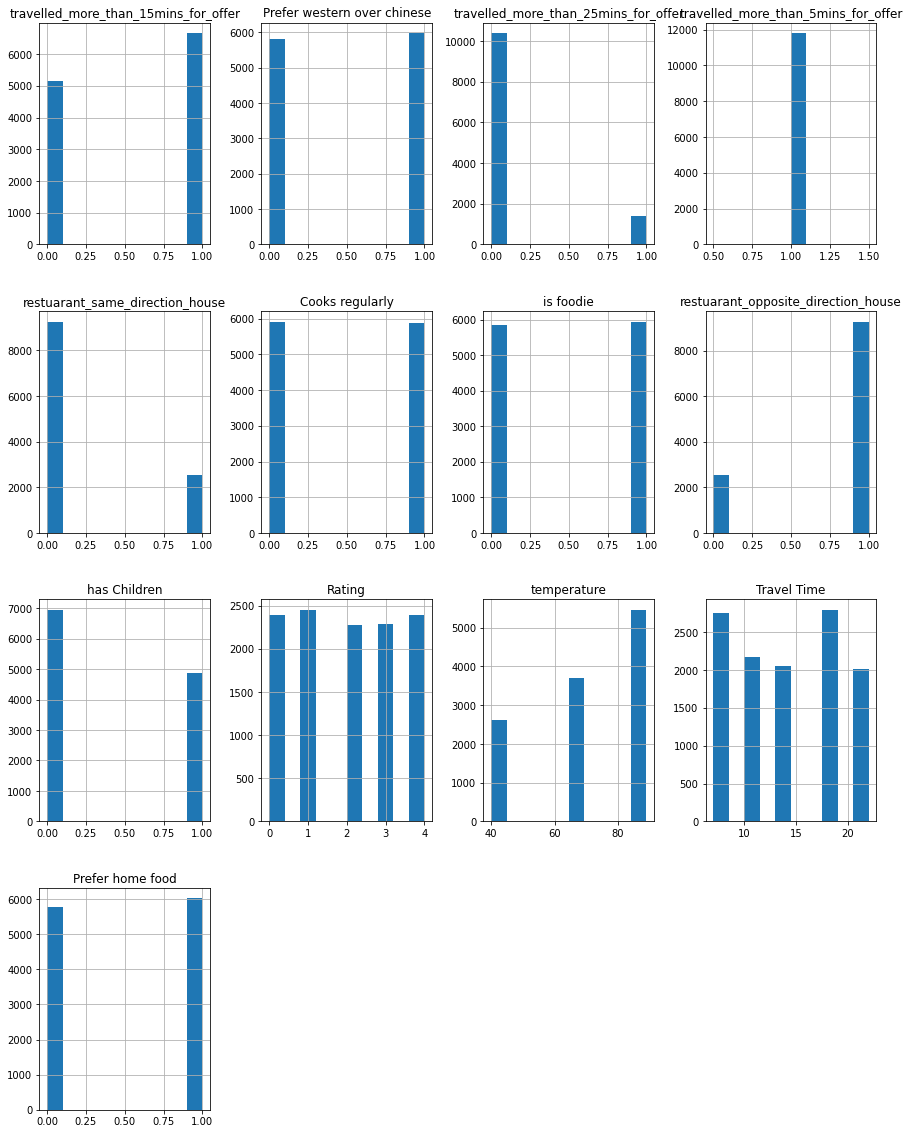

In [13]:
data[num_columns].hist(figsize=(15, 20));

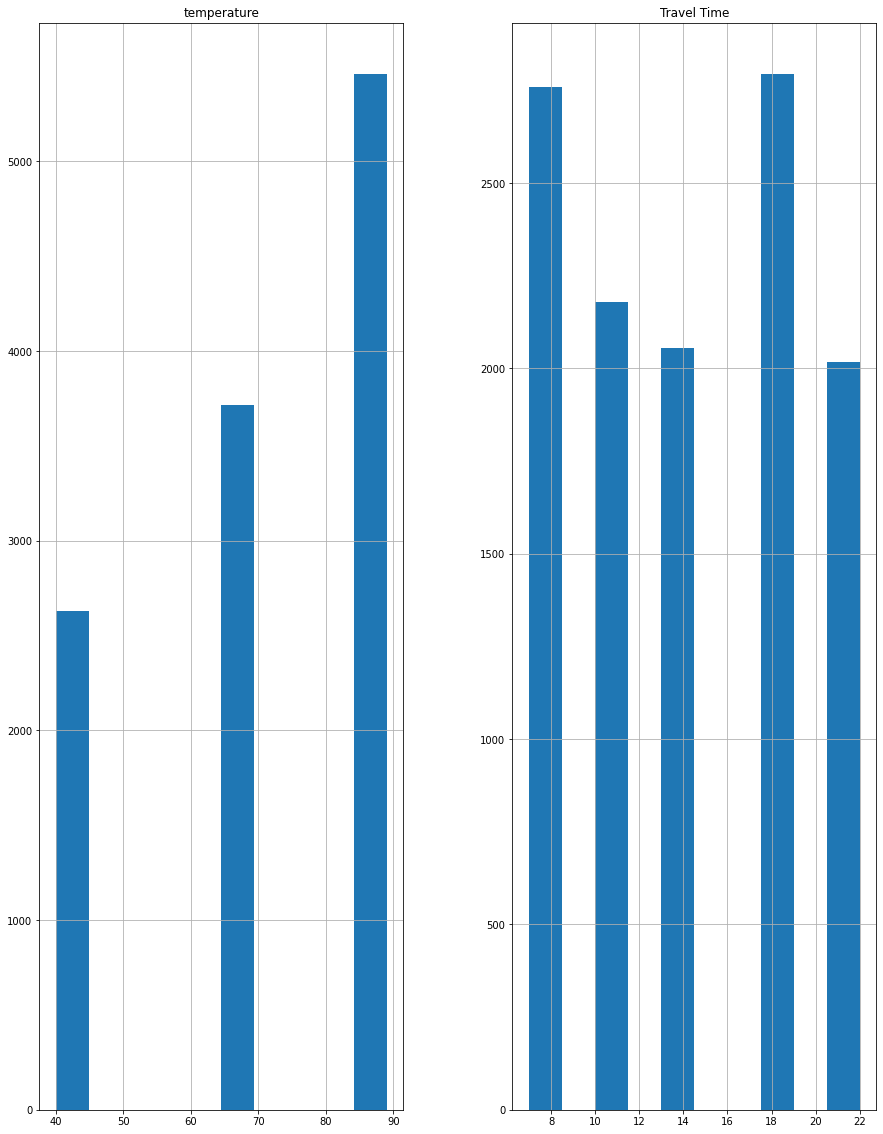

In [14]:
data[["temperature", "Travel Time"]].hist(figsize=(15,20));

In [15]:
import plotly.express as px

In [16]:
px.scatter_matrix(data[["Rating","temperature", "Travel Time"]])

In [17]:
corr = data[["Cooks regularly","has Children","Rating","temperature",
    "Travel Time","Prefer home food"]].corr()

In [18]:
px.imshow(corr)

# **Working on Data**

In [19]:
orignal_data.shape

(11802, 29)

In [20]:
data.shape

(11802, 29)

In [21]:
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler
minmax = MinMaxScaler()

In [22]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse = False)

In [23]:
from sklearn.impute import SimpleImputer
simp = SimpleImputer(strategy="most_frequent")

In [24]:
num_columns

['travelled_more_than_15mins_for_offer',
 'Prefer western over chinese',
 'travelled_more_than_25mins_for_offer',
 'travelled_more_than_5mins_for_offer',
 'restuarant_same_direction_house',
 'Cooks regularly',
 'is foodie',
 'restuarant_opposite_direction_house',
 'has Children',
 'Rating',
 'temperature',
 'Travel Time',
 'Prefer home food']

In [25]:
ecat = onehot.fit_transform(orignal_data[cat_columns])
enum = minmax.fit_transform(orignal_data[num_columns])

In [26]:
orignal_data[cat_columns]

,offer expiration,income_range,no_visited_Cold drinks,Restaur_spend_less_than20,Marital Status,restaurant type,age,no_visited_bars,gender,Customer type,Qualification,no_Take-aways,Job/Job Industry,Restaur_spend_greater_than20,Climate,drop location
0,2days,₹100000 or More,4~8,less1,Married partner,4 star restaurant,36,less1,Female,Individual,Bachelors degree,1~3,Unemployed,less1,Spring,Location B
1,2days,₹87500 - ₹99999,4~8,4~8,Married partner,Take-away restaurant,50plus,never,Female,Individual,Bachelors degree,1~3,Unemployed,1~3,Summer,Location B
2,2days,₹87500 - ₹99999,less1,1~3,Single,Cold drinks,26,never,Female,Individual,Bachelors degree,1~3,Arts Design Entertainment Sports & Media,less1,Winter,Location A
3,10hours,₹37500 - ₹49999,less1,1~3,Single,Take-away restaurant,46,never,Male,Individual,Some college - no degree,1~3,Sales & Related,1~3,Summer,Location C
4,2days,₹100000 or More,never,1~3,Single,4 star restaurant,21,less1,Female,Individual,Some college - no degree,gt8,Sales & Related,less1,Summer,Location C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12374,10hours,₹25000 - ₹37499,less1,gt8,Unmarried partner,Restaurant with pub,50plus,never,Female,Individual,Some college - no degree,less1,Sales & Related,never,Summer,Location B
12375,2days,₹25000 - ₹37499,4~8,never,Single,Take-away restaurant,21,1~3,Male,With Family,Some college - no degree,less1,Personal Care & Service,never,Summer,Location B
12376,10hours,₹87500 - ₹99999,4~8,gt8,Married partner,Cold drinks,31,1~3,Female,Individual,Bachelors degree,1~3,Management,gt8,Spring,Location B
12377,10hours,₹12500 - ₹24999,4~8,less1,Married partner,2 star restaurant,26,never,Male,Individual,Bachelors degree,4~8,Student,less1,Summer,Location C


### **Working on y**

In [27]:
'''
yl = []
for i in y:
    if i == 'Yes':
        yl.append(1)
    else:
        yl.append(0)
        '''

"\nyl = []\nfor i in y:\n    if i == 'Yes':\n        yl.append(1)\n    else:\n        yl.append(0)\n        "

In [28]:
'''
for i in range(len(y)):
    y[i] = yl[i]
    '''

'\nfor i in range(len(y)):\n    y[i] = yl[i]\n    '

# **Data for Modeling**

In [29]:
X = np.concatenate((enum,ecat),axis= 1)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X,y, test_size= 0.2,random_state=42,shuffle= False)

In [31]:
x_train

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [32]:
y_train

0        No
1       Yes
2       Yes
3        No
4        No
       ... 
9897     No
9898    Yes
9899    Yes
9900    Yes
9901     No
Name: Offer Accepted, Length: 9441, dtype: object

In [33]:
y_train.replace(('Yes','No'),(1,0),inplace = True)

In [34]:
y_train

0       0
1       1
2       1
3       0
4       0
       ..
9897    0
9898    1
9899    1
9900    1
9901    0
Name: Offer Accepted, Length: 9441, dtype: int64

In [35]:
x_test

array([[1., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 0., 0.]])

In [36]:
y_test.replace(('Yes','No'),(1,0),inplace = True)

In [37]:
y_test

9902     0
9903     1
9904     0
9905     1
9906     1
        ..
12374    1
12375    1
12376    0
12377    1
12378    1
Name: Offer Accepted, Length: 2361, dtype: int64

# **Test Data Modification**

In [38]:
test_data.drop(["car"],axis= 1, inplace= True)
test_data.rename(columns={'visit restaurant with rating (avg)':'Rating'},inplace = True)

In [39]:
null_col_test = test_data.isna().sum().loc[test_data.isna().sum() > 0].index

In [40]:
from sklearn.impute import SimpleImputer
test_data[null_col_test] = pd.DataFrame(
    simp.fit_transform(test_data[null_col_test]),columns= data[null_col_test].columns)

In [41]:
ecat_test = onehot.fit_transform(test_data[cat_columns])
enum_test = minmax.fit_transform(test_data[num_columns])
X_test = np.concatenate((enum_test,ecat_test), axis= 1)

# **Model Fitting**

### **Random Forest**

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [43]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [44]:
rf.score(x_test,y_test)

0.6332062685302838

**Hyperparameter tuning @randomforest**

In [45]:
#stop

In [46]:
para = {'n_estimators':[10,25,50,75,100,1000],
        'max_depth':[2,5,10,15],
        'min_samples_split':[2,3,4]}

In [47]:
from sklearn.model_selection import GridSearchCV
gsv_rf = GridSearchCV(rf,para, scoring='f1_micro', cv = 5)

In [48]:
gsv_rf.fit(x_train, y_train)
gsv_rf.score(x_test,y_test)

0.6518424396442185

In [49]:
gsv_rf.best_params_

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 1000}

### **XGBoost**

In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 11)

In [51]:
data = pd.DataFrame(simp.fit_transform(data), columns = data.columns)

In [52]:
l = []
for i in data.columns:
  try:
    data[i] = data[i].astype('int')
  except Exception as e:
    l.append(i)

In [53]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=11,
              reg_alpha=0, reg_lambda=1, ...)

In [54]:
xgb.score(x_test,y_test)

0.6387124099957645

**Hyperparameter tuning @XGBoost**

In [55]:
'''
params = {'learning_rate':[0.01,0.1,0.2,0.3],
          'max_depth':[3,5,7,8,10],
          'gamma':[0.1,0.2],
          'min_child_weight':[1,3,5]}
          '''

"\nparams = {'learning_rate':[0.01,0.1,0.2,0.3],\n          'max_depth':[3,5,7,8,10],\n          'gamma':[0.1,0.2],\n          'min_child_weight':[1,3,5]}\n          "

In [56]:
#gsv_xgb = GridSearchCV(xgb,params,scoring ='f1_micro',cv = 5)

In [57]:
#gsv_xgb.fit(x_train,y_train)

In [58]:
#gsv_xgb.score(x_test,y_test)

# **Final Model Selected after Grid search CV**

In [59]:
final_model = RandomForestClassifier(max_depth = 15, min_samples_split = 4, n_estimators = 1000)
final_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_split=4, n_estimators=1000)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.64      0.41      0.50      1009
           1       0.65      0.83      0.73      1352

    accuracy                           0.65      2361
   macro avg       0.65      0.62      0.62      2361
weighted avg       0.65      0.65      0.63      2361



In [61]:
final_model.score(x_test,y_test)

0.6514188903007201

# **Output of Model Selection**

In [62]:
y_pred = final_model.predict(X_test)
preds_csv = pd.DataFrame({
    'id': range(len(y_pred)),
    'Offer Accepted':y_pred
})

In [63]:
preds_csv['Offer Accepted'].replace((1,0),('Yes','No'),inplace = True)

In [64]:
preds_csv

,id,Offer Accepted
0,0,Yes
1,1,Yes
2,2,No
3,3,No
4,4,Yes
...,...,...
5300,5300,Yes
5301,5301,Yes
5302,5302,No
5303,5303,Yes


In [65]:
preds_csv.to_csv("MLP_Project_sub_Term-3.csv",index= False)

In [66]:
#End